#**Include Header Files**

In [193]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas
import sklearn
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# **LOADING THE DATASET AND VISUALISING IT**

**The training data**

In [194]:
f = open("train_dataset.pickle", 'rb')
train_dataset = pickle.load(f)
f.close()
# print(train_dataset[1])



**the Testing Data**

In [195]:
f = open('test_dataset.pickle','rb')
test_dataset = pickle.load(f)
f.close()

X_test = test_dataset[: ,0]
Y_test = test_dataset[: ,1]

**Dividing Data into 20 sets randomly**


In [196]:
random.seed(83)
random.shuffle(train_dataset)

num_datasets = 20 
#convert into numpy array 
train_dataset_np = np.array(train_dataset)
parts_train_dataset = np.array_split(train_dataset_np,20)
X_train = []
Y_train = []
for i in range(20):
  X_train.append(parts_train_dataset[i][: , 0])
  Y_train.append(parts_train_dataset[i][: , 1])

# print(X_train[0], parts_train_dataset[0][: ,0])
  
# print((parts_train_dataset))

#plot a x_train , y_train 
# sns.implot(x='' , y = '')

*Set all Sizes*


In [197]:
t = len(X_train)*len(X_train[0])
train_size_total = t
train_size_each = len(X_train[0])
test_size = len(X_test)

print(train_size_total , train_size_each, test_size)

800 40 200


In [198]:
all_X_training =[]
all_Y_training =[]
for i in range(20):
  for j in range(40):
    all_X_training.append(X_train[i][j])
    all_Y_training.append(Y_train[i][j])

print((all_X_training))
print(len(X_test))

[0.03780919822483675, 0.03780919822483675, 0.07671389414721352, 0.07671389414721352, 0.03780919822483675, 0.9389557431149645, 0.03780919822483675, 0.3579239727764443, 0.30393181599363495, 0.5901581674117827, 0.3579239727764443, 0.5901581674117827, 0.9389557431149645, 0.813525156217041, 0.4899196387411887, 0.25653212729920116, 0.9389557431149645, 0.43549389931692806, 0.42747691010590405, 0.5793229886646022, 0.5047595627917727, 0.813525156217041, 0.07513843827491351, 0.23530317986772276, 0.42747691010590405, 0.5901581674117827, 0.8380278178448117, 0.24560329272306658, 0.6089676729974169, 0.25653212729920116, 0.30393181599363495, 0.9254536700645093, 0.43549389931692806, 0.8697793087868855, 0.5047595627917727, 0.3579239727764443, 0.3579239727764443, 0.23842050204470333, 0.8697793087868855, 0.0365059985781131, 0.43108810743866255, 0.6089676729974169, 0.23530317986772276, 0.12102631401648678, 0.07671389414721352, 0.8094908506597459, 0.6643217097202233, 0.249317841263907, 0.21980955807363933,

# **Visualising data**

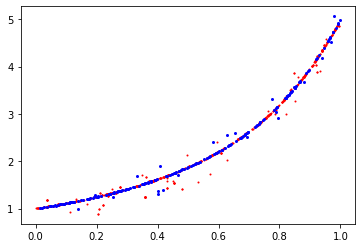

In [199]:
fig = plt.figure()
plt.plot(all_X_training, all_Y_training, 'r.', markersize=2)
plt.plot( X_test,Y_test , 'b.', markersize=4)
plt.show()

**Graphing Each Of The Training Datasets**


Training set  1


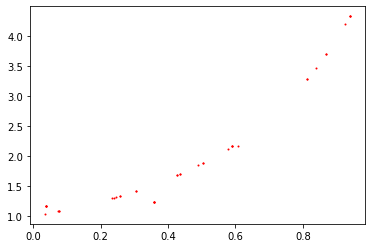

Training set  2


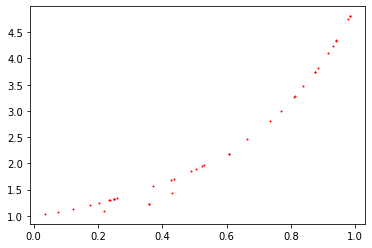

Training set  3


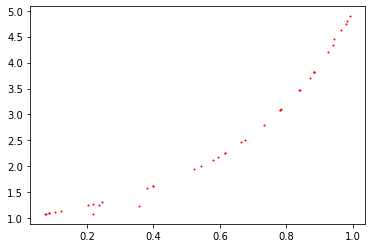

Training set  4


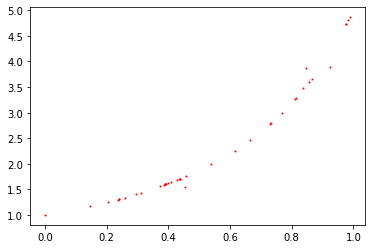

Training set  5


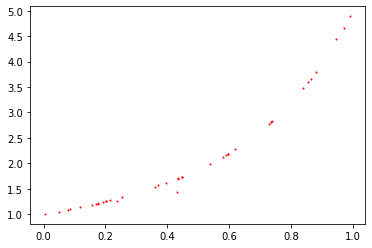

Training set  6


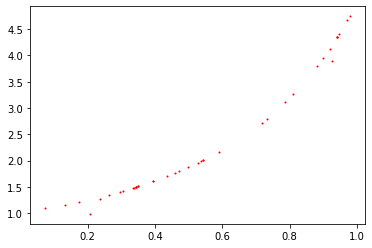

Training set  7


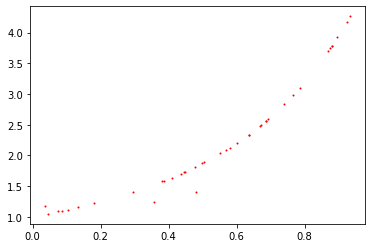

Training set  8


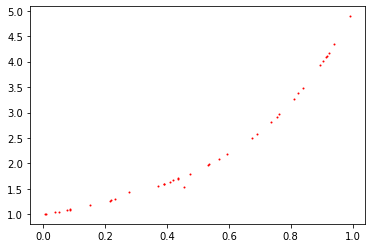

Training set  9


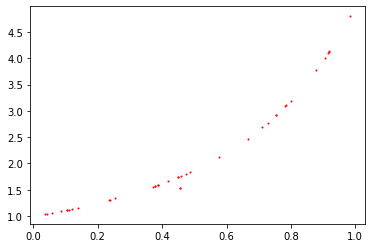

Training set  10


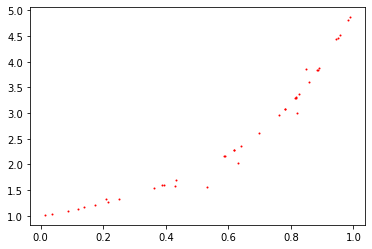

Training set  11


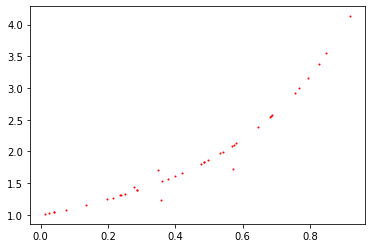

Training set  12


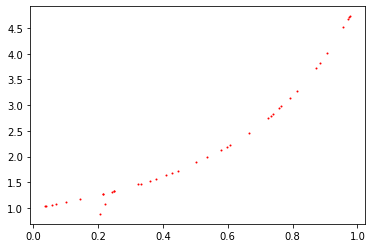

Training set  13


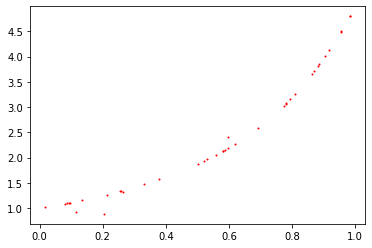

Training set  14


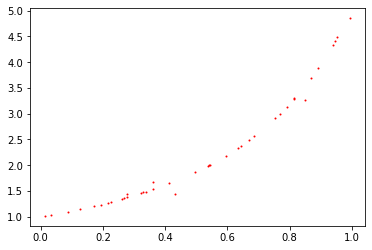

Training set  15


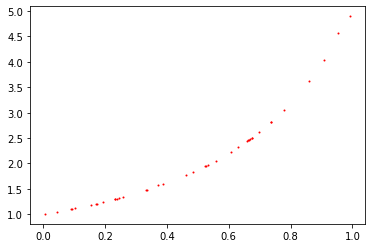

Training set  16


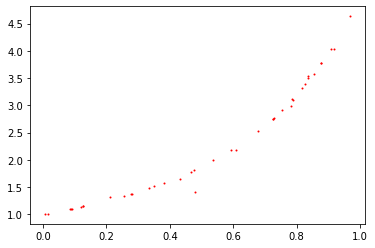

Training set  17


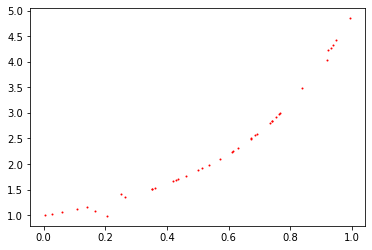

Training set  18


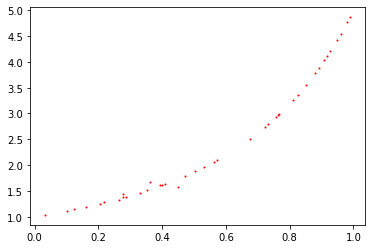

Training set  19


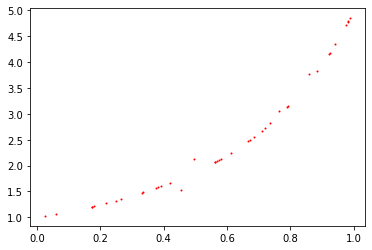

Training set  20


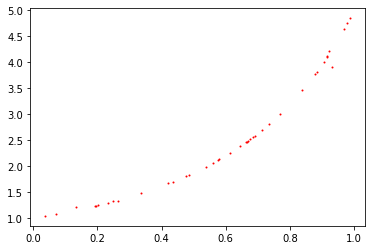

In [200]:
for i in range(20):
    print("Training set ",i+1)
    fig = plt.figure()
    plt.plot(X_train[i], Y_train[i], 'r.', markersize=2)
    plt.show()

# **Traininng 20 datasets on regression from degree 0 to 15**


In [201]:
def create_polynomial_regression_model(degree,i):
    i = 0
    # prepare the matrix of the powers of x
    poly_features = PolynomialFeatures(degree=degree)
    # transpose the x row matrix into a column matrix
    x = X_train[i][:, np.newaxis]
    # get a matrix containing the higher powers of X in the format: [1 X X^2 X^3 ...]
    X_train_poly = poly_features.fit_transform(x)
    poly_model = LinearRegression()
    # fit the transformed features to Linear Regression
    poly_model.fit(X_train_poly, Y_train[0])
    y_test_predict = poly_model.predict(
        poly_features.fit_transform(X_test))    # predicting on test data-set
    return poly_model

# graphs of each model for each degree

In [ ]:
for i in range(15):
    print("TRAINING SET ", i+1)
    f = plt.figure()
    f, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(30, 30))
    x = X_train[i][:, np.newaxis]  # transposing it
    y = Y_train[i]
    for degree in range(15):
        axes[int(degree/4)][int(degree % 4)].plot(x, y, 'r.', markersize=4)
        poly_features = PolynomialFeatures(degree=degree+1)
        X_train_poly = poly_features.fit_transform(x)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train[i])
        y_test_predict = poly_model.predict(
            poly_features.fit_transform(X_test[:, np.newaxis]))
        axes[int(degree/4)][int(degree % 4)].plot(X_test[:, np.newaxis], y_test_predict, 'b.', markersize=4)
        plt.title("DEGREE "+str(degree+1))
        plt.xlabel("X")
        plt.ylabel("Y")
    plt.show()

# *CALCULATE THE BIAS AND VARIANCE OF THE MODEL*

In [203]:
y_predicted = []
for i in range(20):
    x = X_train[i][:, np.newaxis]  # transposing it
    y = Y_train[i]
    temp = []
    for degree in range(15):
        poly_features = PolynomialFeatures(degree=degree+1)
        X_train_poly = poly_features.fit_transform(x)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train[i])
        y_test_predict = poly_model.predict(
            poly_features.fit_transform(X_test[:, np.newaxis]))
        temp.append(y_test_predict)
    y_predicted.append(temp)

In [204]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(20):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = np.asarray(y_predicted_part)
    bias = np.abs(np.mean(y_predicted_part, axis=0) - Y_test)
    variance = np.var(y_predicted_part, axis=0)
    return(np.mean(bias), np.mean(variance))

In [205]:
bias = []
variance = []
for i in range(15):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [0.2727963162148501, 0.08837407381647398, 0.03607399043654253, 0.030756022132794693, 0.029653201252889897, 0.02957989360446478, 0.0303587696608283, 0.030773635071715884, 0.03306027234891062, 0.04084517236418716, 0.06602896854989707, 0.06028835574364384, 0.10565283473869277, 0.17419666268090686, 0.3368294847674562]
Variance: [0.010322333808390385, 0.0012226331873127526, 0.0004722384568122996, 0.0005362070514899337, 0.0006426957399672809, 0.0009278035417794098, 0.002094900406774873, 0.003246486850773189, 0.008108079634389248, 0.03933307667816321, 0.32142978368897046, 0.12583880223142377, 3.9461272584580875, 5.516965187595118, 71.03421253612609]


In [206]:
final_table = dict()
final_table["DEGREE"] = range(1, 16)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(final_table["BIAS^2"])+np.array(variance))
final_table["IRReducable Error"] = list(np.array(final_table["MSE"]) - np.array(variance) -np.array(final_table["BIAS^2"]))
df = pandas.DataFrame(final_table)
print(df)

    DEGREE      BIAS    BIAS^2   VARIANCE        MSE  IRReducable Error
0        1  0.272796  0.074418   0.010322   0.084740       0.000000e+00
1        2  0.088374  0.007810   0.001223   0.009033      -8.673617e-19
2        3  0.036074  0.001301   0.000472   0.001774       0.000000e+00
3        4  0.030756  0.000946   0.000536   0.001482       1.084202e-19
4        5  0.029653  0.000879   0.000643   0.001522       1.084202e-19
5        6  0.029580  0.000875   0.000928   0.001803       0.000000e+00
6        7  0.030359  0.000922   0.002095   0.003017       2.168404e-19
7        8  0.030774  0.000947   0.003246   0.004194       1.084202e-19
8        9  0.033060  0.001093   0.008108   0.009201       0.000000e+00
9       10  0.040845  0.001668   0.039333   0.041001      -2.168404e-19
10      11  0.066029  0.004360   0.321430   0.325790       6.938894e-18
11      12  0.060288  0.003635   0.125839   0.129473      -8.673617e-18
12      13  0.105653  0.011163   3.946127   3.957290       3.469

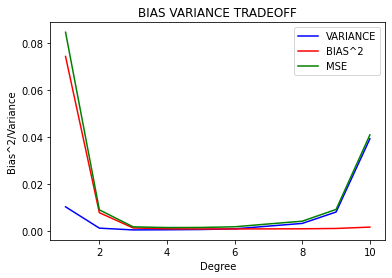

In [207]:
plt.plot(final_table["DEGREE"][0:10], final_table["VARIANCE"][0:10], color="blue")
plt.plot(final_table["DEGREE"][0:10], final_table["BIAS^2"][0:10], color="red")
plt.plot(final_table["DEGREE"][0:10], final_table["MSE"][0:10], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()